# 4章 ニューラルネットワークの学習

## 損失関数

### 2乗和誤差

In [1]:
import numpy as np

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

print(mean_squared_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

print(mean_squared_error(np.array(y), np.array(t)))

0.0975
0.5975


### 交差エントロピー誤差

In [2]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099
2.30258409299


### ミニバッチ学習

In [3]:
import sys, os
os.chdir('./deep-learning-from-scratch/ch04')
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [4]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [5]:
np.random.choice(60000, 10)

array([45400, 15301, 17965, 18164, 12316, 24564, 22908, 30961, 22781, 15784])

### [バッチ対応版] 交差エントロピー誤差

In [6]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    delta = 1e-7
    return -np.sum(t * np.log(y[np.arange(batch_size)] + delta)) / batch_size

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099
2.30258409299


## 数値微分

### 微分

#### 前方差分

In [7]:
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

In [8]:
np.float32(1e-50)

0.0

#### 中心差分

In [9]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (h * 2)

### 数値微分の例
y = 0.01x^2 + 0.1x

In [10]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

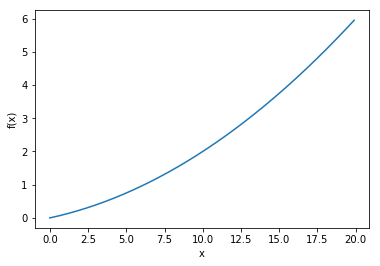

In [11]:
import matplotlib.pylab as plt

%matplotlib inline

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [12]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


### 偏微分

f(x_0, x_1) = x_0^2+ x_1^2

In [13]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2
#     return np.sum(x ** 2)

In [14]:
def function_tmp1(x0):
    return x0 * x0 + 4.0 ** 2.0
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [15]:
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1
numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 勾配

In [16]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (h * 2)
        x[idx] = tmp_val
        
    return grad

In [17]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[ 6.  8.]
[ 0.  4.]
[ 6.  0.]


### 勾配法

In [18]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x

f(x_0, x_1) = x_0^2 + x_1^2 の最小値を勾配法で求めよ

In [19]:
def function_2(x):
#     return x[0] ** 2 + x[1] ** 2
    return np.sum(x ** 2)

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100))

[ -6.11110793e-10   8.14814391e-10]


#### 学習率が大きすぎる例

In [20]:
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr = 10.0, step_num = 100))

[ -2.58983747e+13  -1.29524862e+12]


#### 学習率が大きすぎる例

In [21]:
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num = 100))

[-2.99999994  3.99999992]


### ニューラルネットワークに対する勾配

In [22]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [23]:
net = simpleNet()
print(net.W)

[[ 0.11475088 -1.89974085  1.76471866]
 [ 1.1284763  -0.45898537 -0.14947872]]


In [24]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 1.0844792  -1.55293134  0.92430035]


In [25]:
np.argmax(p)

0

In [26]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.81434488818923845

In [27]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.31192526  0.0223171  -0.33424236]
 [ 0.46788789  0.03347565 -0.50136354]]


#### lambda

In [28]:
f = lambda W: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.31192526  0.0223171  -0.33424236]
 [ 0.46788789  0.03347565 -0.50136354]]


## 学習アルゴリズムの実装

### 2層ニューラルネットワークのクラス

In [29]:
from common.functions import *

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])
        
        return grads

In [30]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)
print(net.params["W1"].shape)
print(net.params["b1"].shape)
print(net.params["W2"].shape)
print(net.params["b2"].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [31]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [32]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

print(grads["W1"].shape)
print(grads["b1"].shape)
print(grads["W2"].shape)
print(grads["b2"].shape)

(784, 100)
(100,)
(100, 10)
(10,)


### ミニバッチで処理 & テストデータで評価

In [33]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

train_size = x_train.shape[0]
batch_size = 100

iter_per_epoch = max(train_size / batch_size, 1)
iters_num = 10000
learning_rate = 0.1
epoch_num = 0

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.numerical_gradient(x_batch, t_batch)
    
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        epoch_num += 1
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.0906, 0.0892
train acc, test acc | 0.77675, 0.7814
train acc, test acc | 0.8763, 0.8813
train acc, test acc | 0.89715, 0.9024
train acc, test acc | 0.906733333333, 0.9119
train acc, test acc | 0.913133333333, 0.9159
train acc, test acc | 0.917683333333, 0.921
train acc, test acc | 0.92215, 0.9245
train acc, test acc | 0.926183333333, 0.9282
train acc, test acc | 0.928933333333, 0.9302
train acc, test acc | 0.932383333333, 0.9331
train acc, test acc | 0.934166666667, 0.9345
train acc, test acc | 0.937316666667, 0.9363
train acc, test acc | 0.939666666667, 0.9392
train acc, test acc | 0.942133333333, 0.9405
train acc, test acc | 0.944266666667, 0.942
train acc, test acc | 0.94555, 0.9441


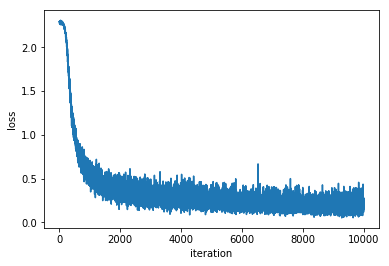

In [34]:
x = np.arange(0, iters_num, 1)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.plot(x, train_loss_list)
plt.show()

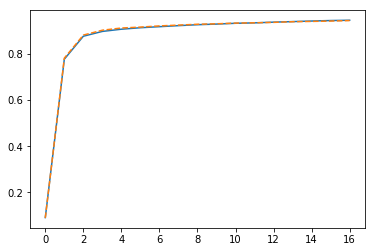

In [35]:
x = np.arange(0, epoch_num, 1)
plt.plot(x, train_acc_list)
plt.plot(x, test_acc_list, linestyle = "--")
plt.show()